<a href="https://colab.research.google.com/github/vaishnaviravi506/LGMVIP-DataScience-Intern/blob/INTERMEDIATE-LEVEL-TASK/Copy_of_TASK2_intermediate_level_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=13d8321aeb93507772e69b6db2d1dfd0b4e9c4655a061df53316dd43819aa06f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-4-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Loading data and displaying the first 5 rows

df = pd.read_csv('/content/iris.csv')
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking the number of rows, data types and the absence of missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# This is a fairly simple sample dataset that does not require deep research, so I will use the AutoEDA tool -
# Pandas Profile Report from pandas_profiling libruary

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Checking the number of unique feature values

df.nunique()

Id              150
sepal_length     35
sepal_width      23
petal_length     43
petal_width      22
Species           3
dtype: int64

In [ ]:
# Since all values in the Id column are unique, it has no value to the model. Delete it

df = df.drop(columns='Id')

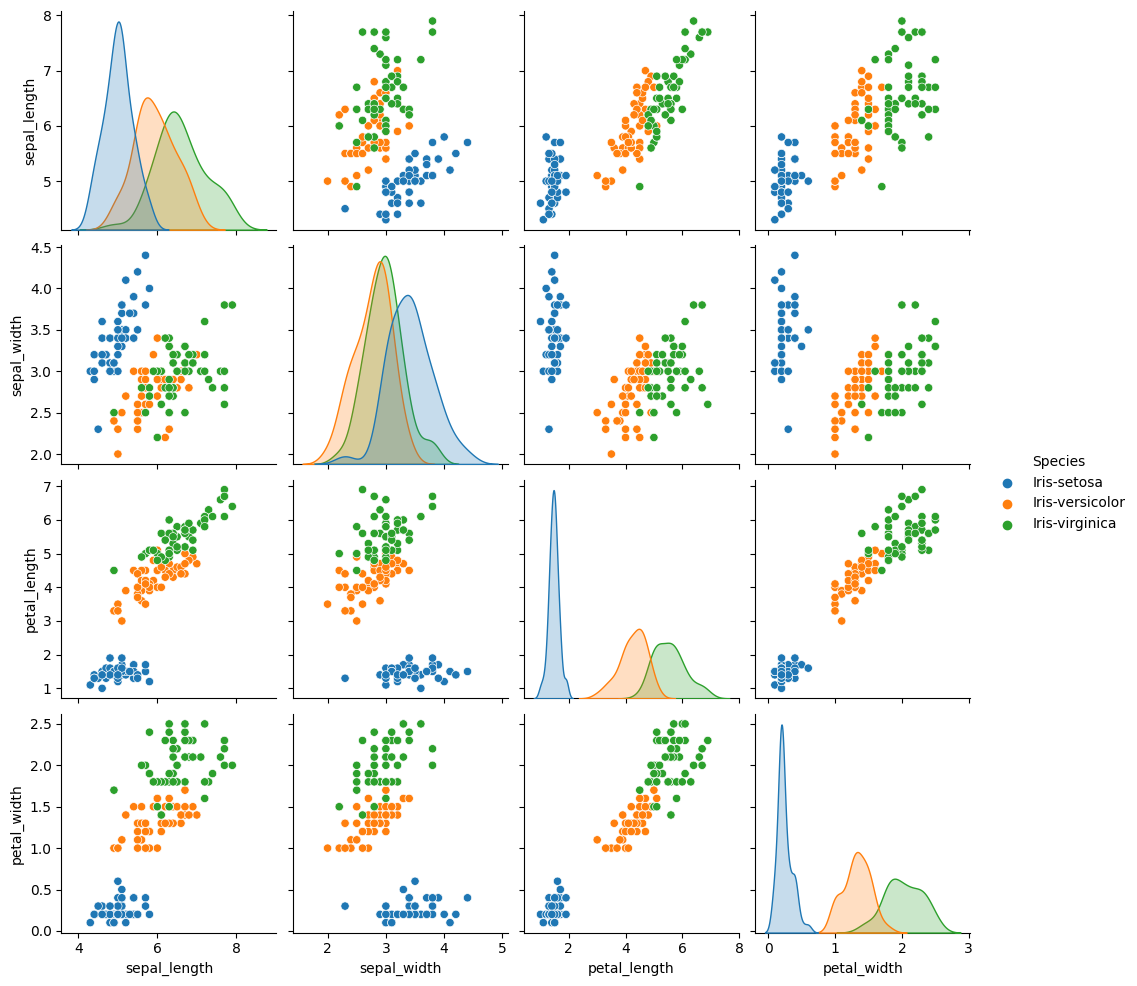

In [ ]:
# Create a grid of pairplot for features

sns.pairplot(df,hue = 'Species')

In [ ]:
# Initialization of features and target variable

x = df.drop(['Species'], axis=1)
y = df['Species']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Create DecisionTreeClassifier Model

tree_model = DecisionTreeClassifier(random_state=1)

In [ ]:
# Calculate the mean value of the metric and standard deviation with 5-fold cross-validation
# Since the target classes are balanced, you can use the 'accuracy' metric

cv_score = cross_val_score(tree_model, x, y, cv=5, scoring='accuracy')
print(f'Mean accuracy score with 5-folds cross-validate for {(str(tree_model).split("(")[0])} model:\
                            \nAccuracy={round(cv_score.mean(), 2)}, std={round(cv_score.std(), 3)}\n')

Mean accuracy score with 5-folds cross-validate for DecisionTreeClassifier model:                            
Accuracy=0.97, std=0.037



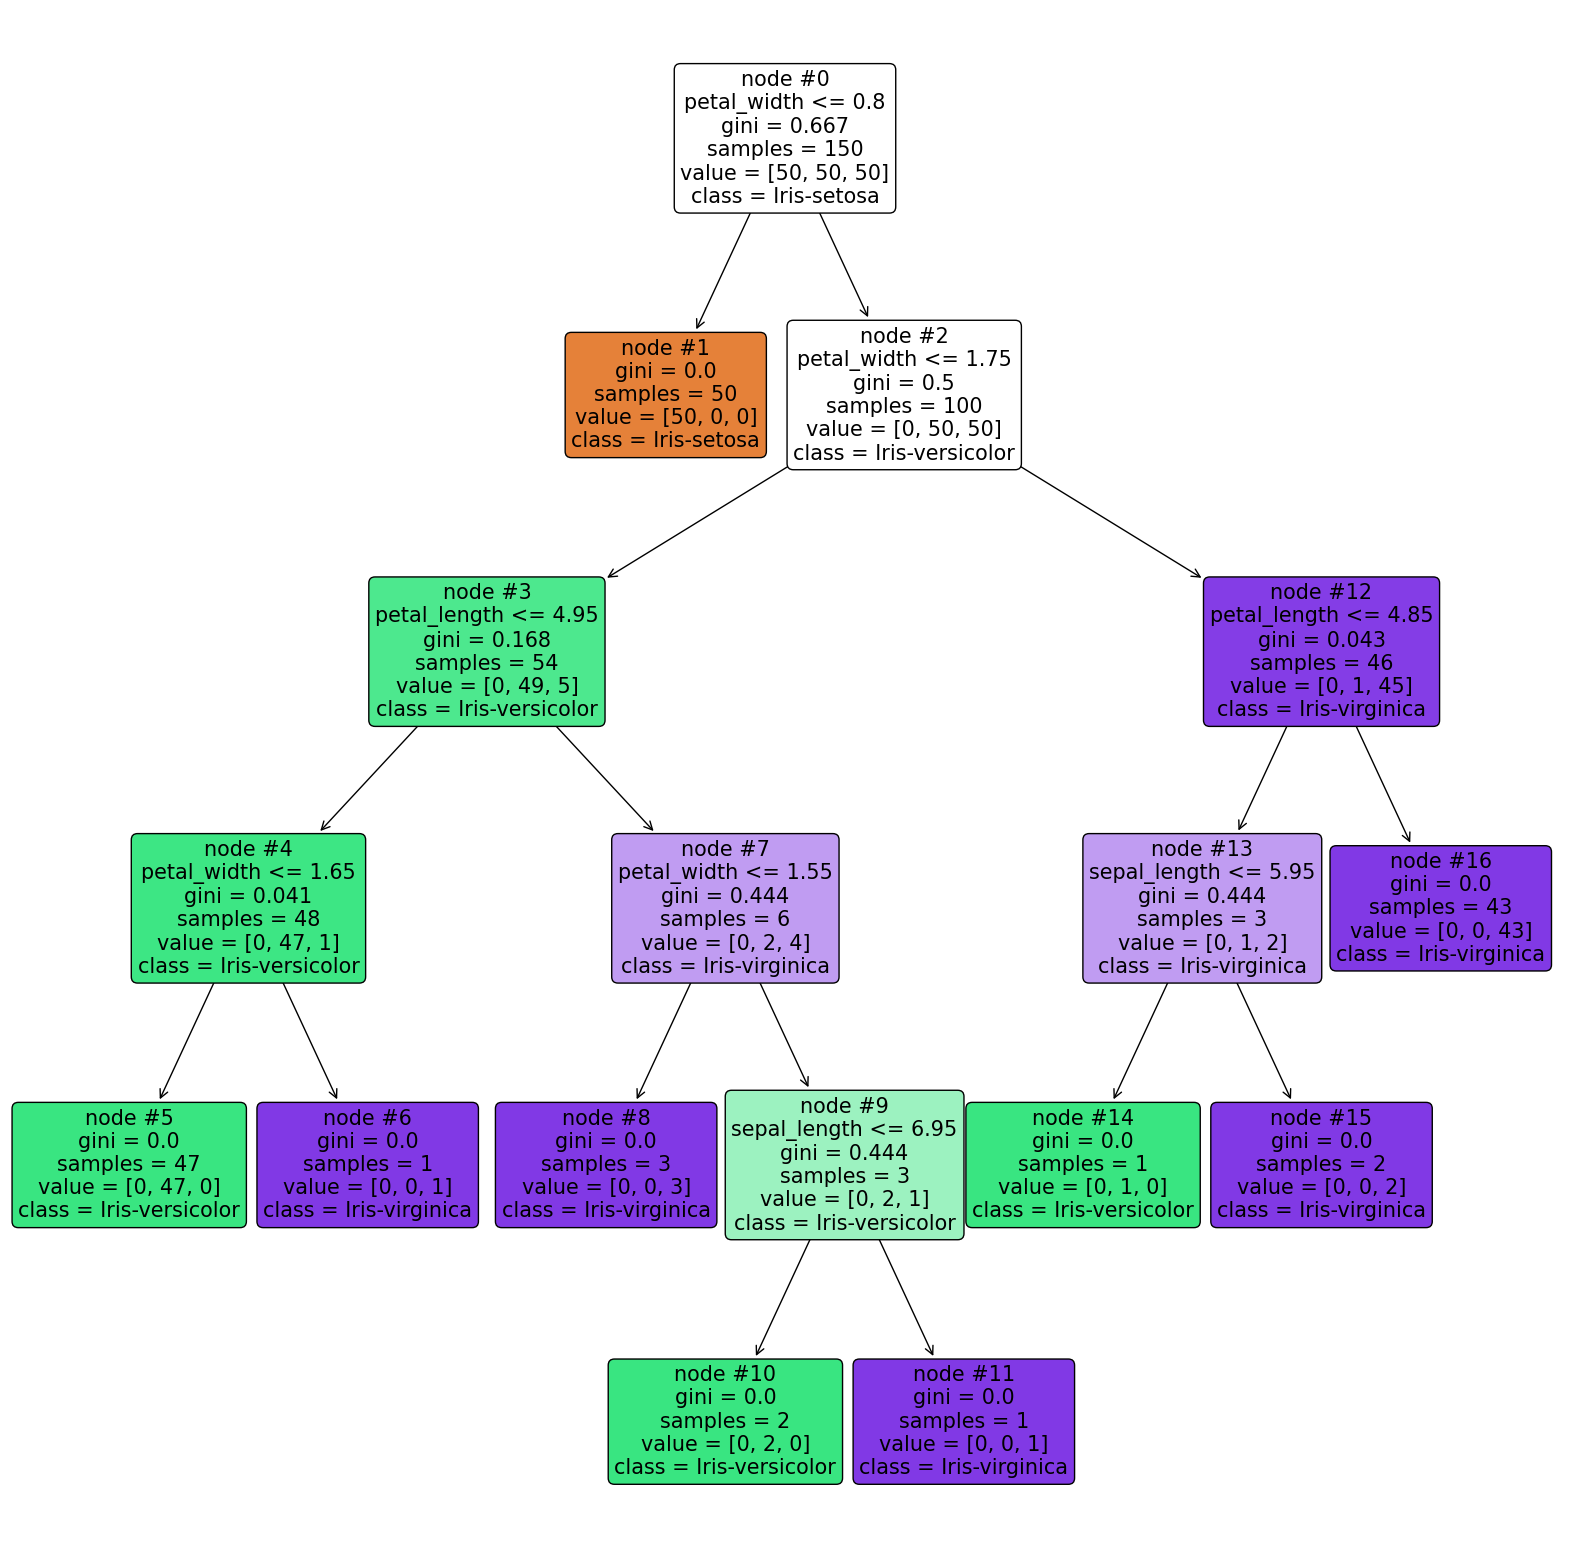

In [ ]:
# Train the model with all the data and visualize the decision tree using the tree.plot_tree of the sklearn library

tree_model.fit(x, y)

fig = plt.figure(figsize=(20, 20))
tree_img = plot_tree(tree_model, feature_names = x.columns.tolist(), class_names = df['Species'].unique().tolist(),
                     filled = True, node_ids=True, rounded=True)